# [Credit Card Default Risk Scoring - EDA]
## Fase 3: Análisis Exploratorio de Datos (EDA)

**Autor:** Ing. Daniel Varela Perez
**Email:** bedaniele0@gmail.com
**Fecha:** 2025-11-07
**Versión:** 1.0

### Objetivos:
1. Cargar y validar el dataset.
2. Realizar un análisis de calidad de datos (nulos, duplicados).
3. Analizar la distribución de la variable objetivo.
4. Explorar las distribuciones de las variables predictoras.
5. Identificar correlaciones y patrones iniciales.
6. Documentar hallazgos para la fase de Feature Engineering.

## 1. Configuración e Importación de Librerías

In [2]:
import pandas as pd
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Carga de Datos

In [3]:
def load_config(config_path='../config/config.yaml'):
    """Carga la configuración desde un archivo YAML."""
    with open(config_path, 'r') as f:
        return yaml.safe_load(f)

config = load_config()
raw_data_path = f"../{config['paths']['raw_data']}"

df = pd.read_csv(raw_data_path)

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## 3. Análisis Básico del Dataset

In [4]:
print(f"Dimensiones del dataset: {df.shape}")
print("\nInformación general del dataset:")
df.info()

Dimensiones del dataset: (30000, 25)

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  i

In [5]:
print("\nResumen estadístico de variables numéricas:")
df.describe().T


Resumen estadístico de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## 4. Calidad de Datos

In [ ]:
print("Valores nulos por columna:")
print(df.isnull().sum())

In [6]:
print(f"\nNúmero de registros duplicados: {df.duplicated().sum()}")


Número de registros duplicados: 0


## 5. Análisis de la Variable Objetivo

Distribución de la variable objetivo: 'default payment next month'
default payment next month
0    77.88
1    22.12
Name: proportion, dtype: float64


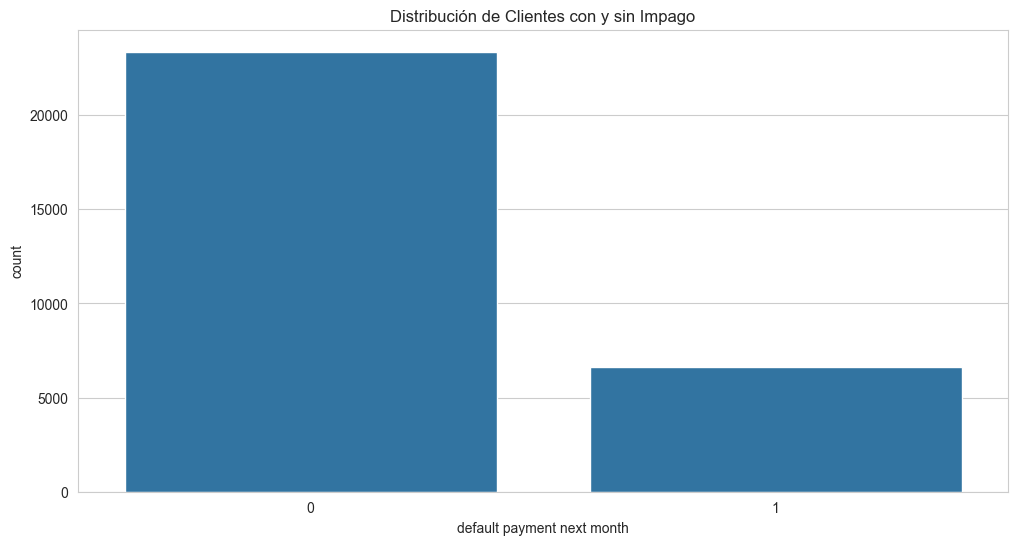

In [7]:
target = config['target_variable']
print(f"Distribución de la variable objetivo: '{target}'")
print(df[target].value_counts(normalize=True) * 100)

sns.countplot(x=target, data=df)
plt.title('Distribución de Clientes con y sin Impago')
plt.show()

**Observación:** El dataset está desbalanceado. Aproximadamente el 22% de los clientes incumplieron el pago, lo que deberemos tener en cuenta durante el modelado (usando `class_weight`, `SMOTE`, etc.).

## 6. Análisis de Variables Predictoras

### Variables Numéricas

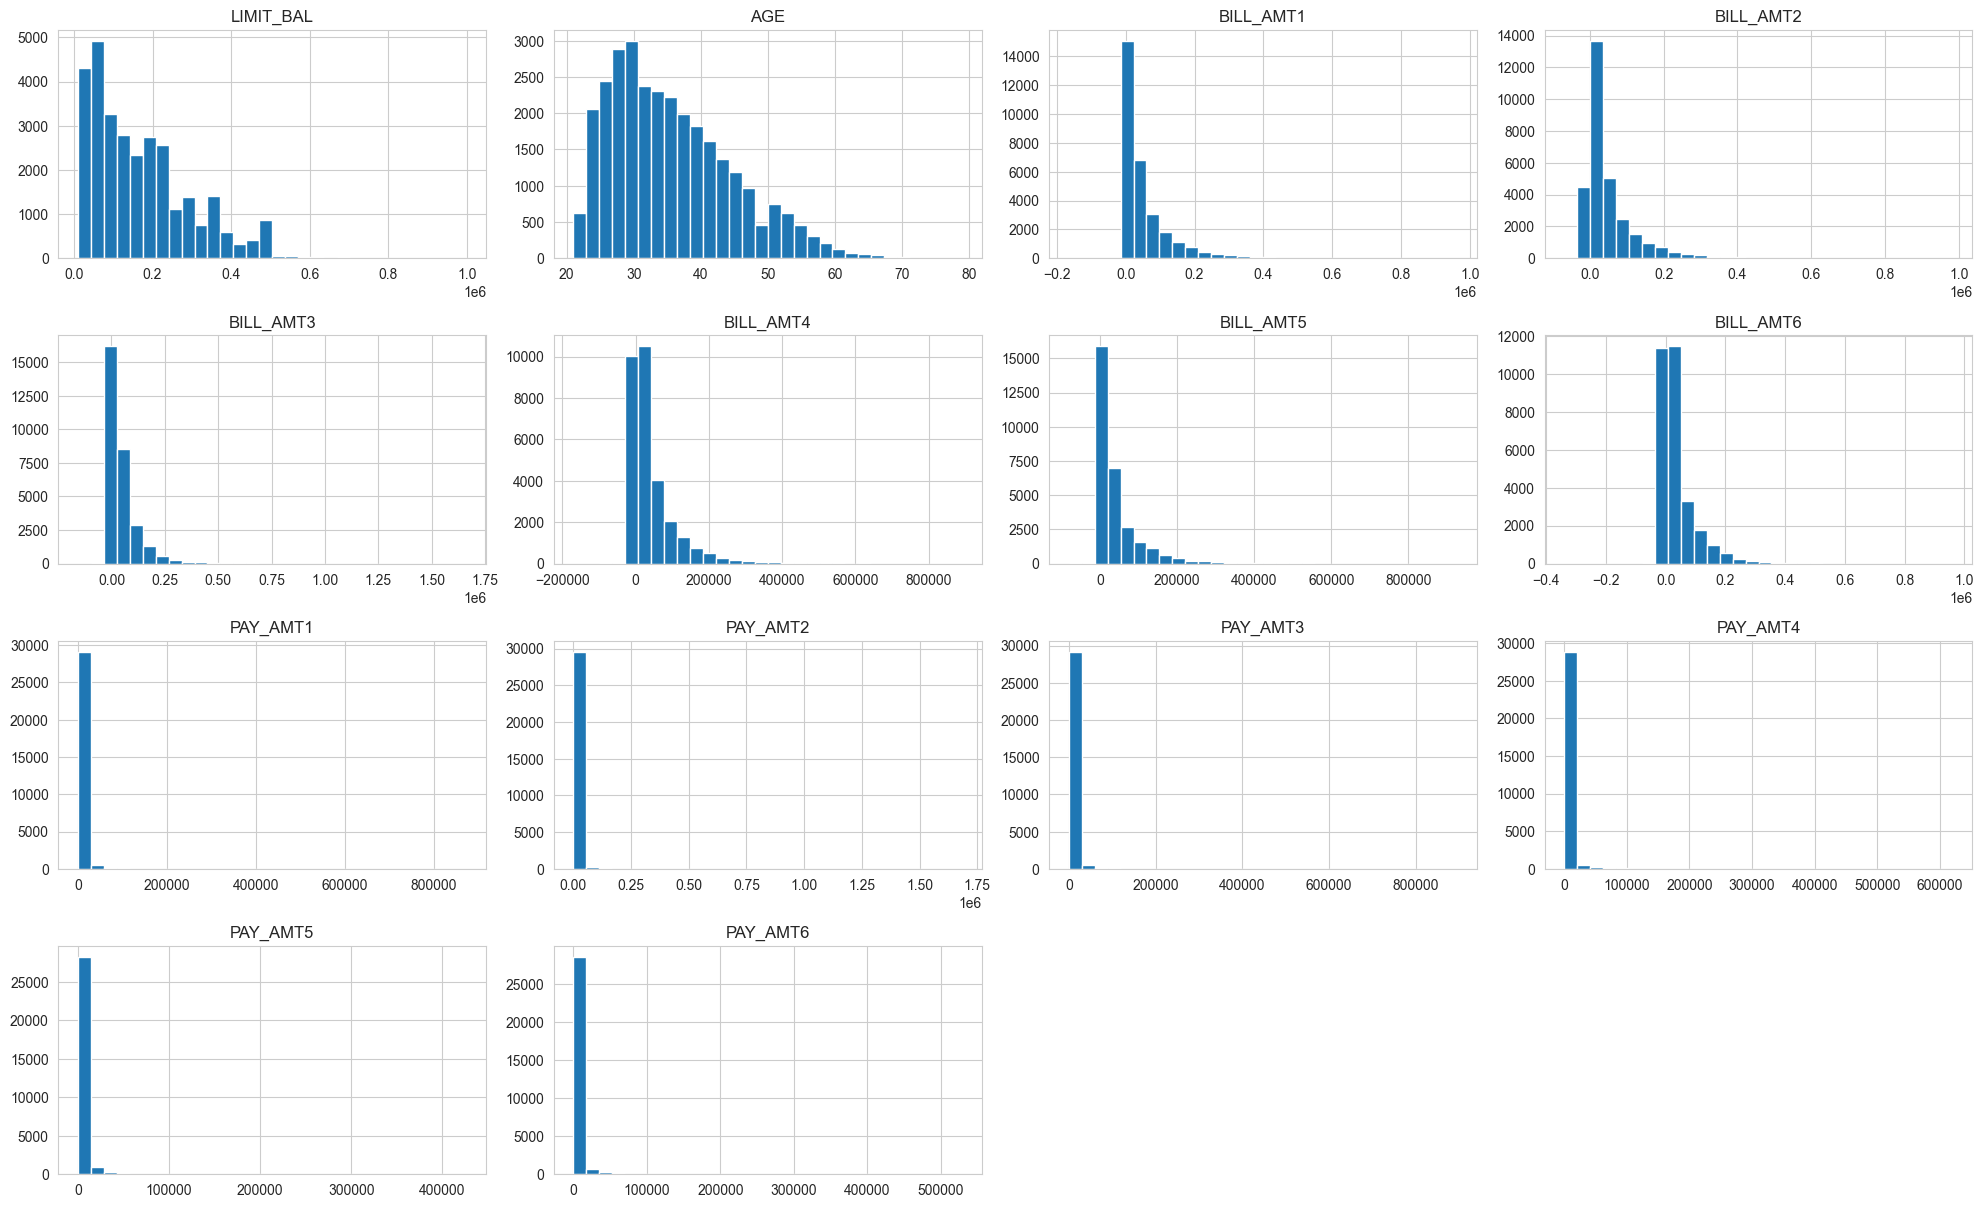

In [8]:
num_cols = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

df[num_cols].hist(bins=30, figsize=(20, 15), layout=(5, 4))
plt.tight_layout()
plt.show()

### Variables Categóricas

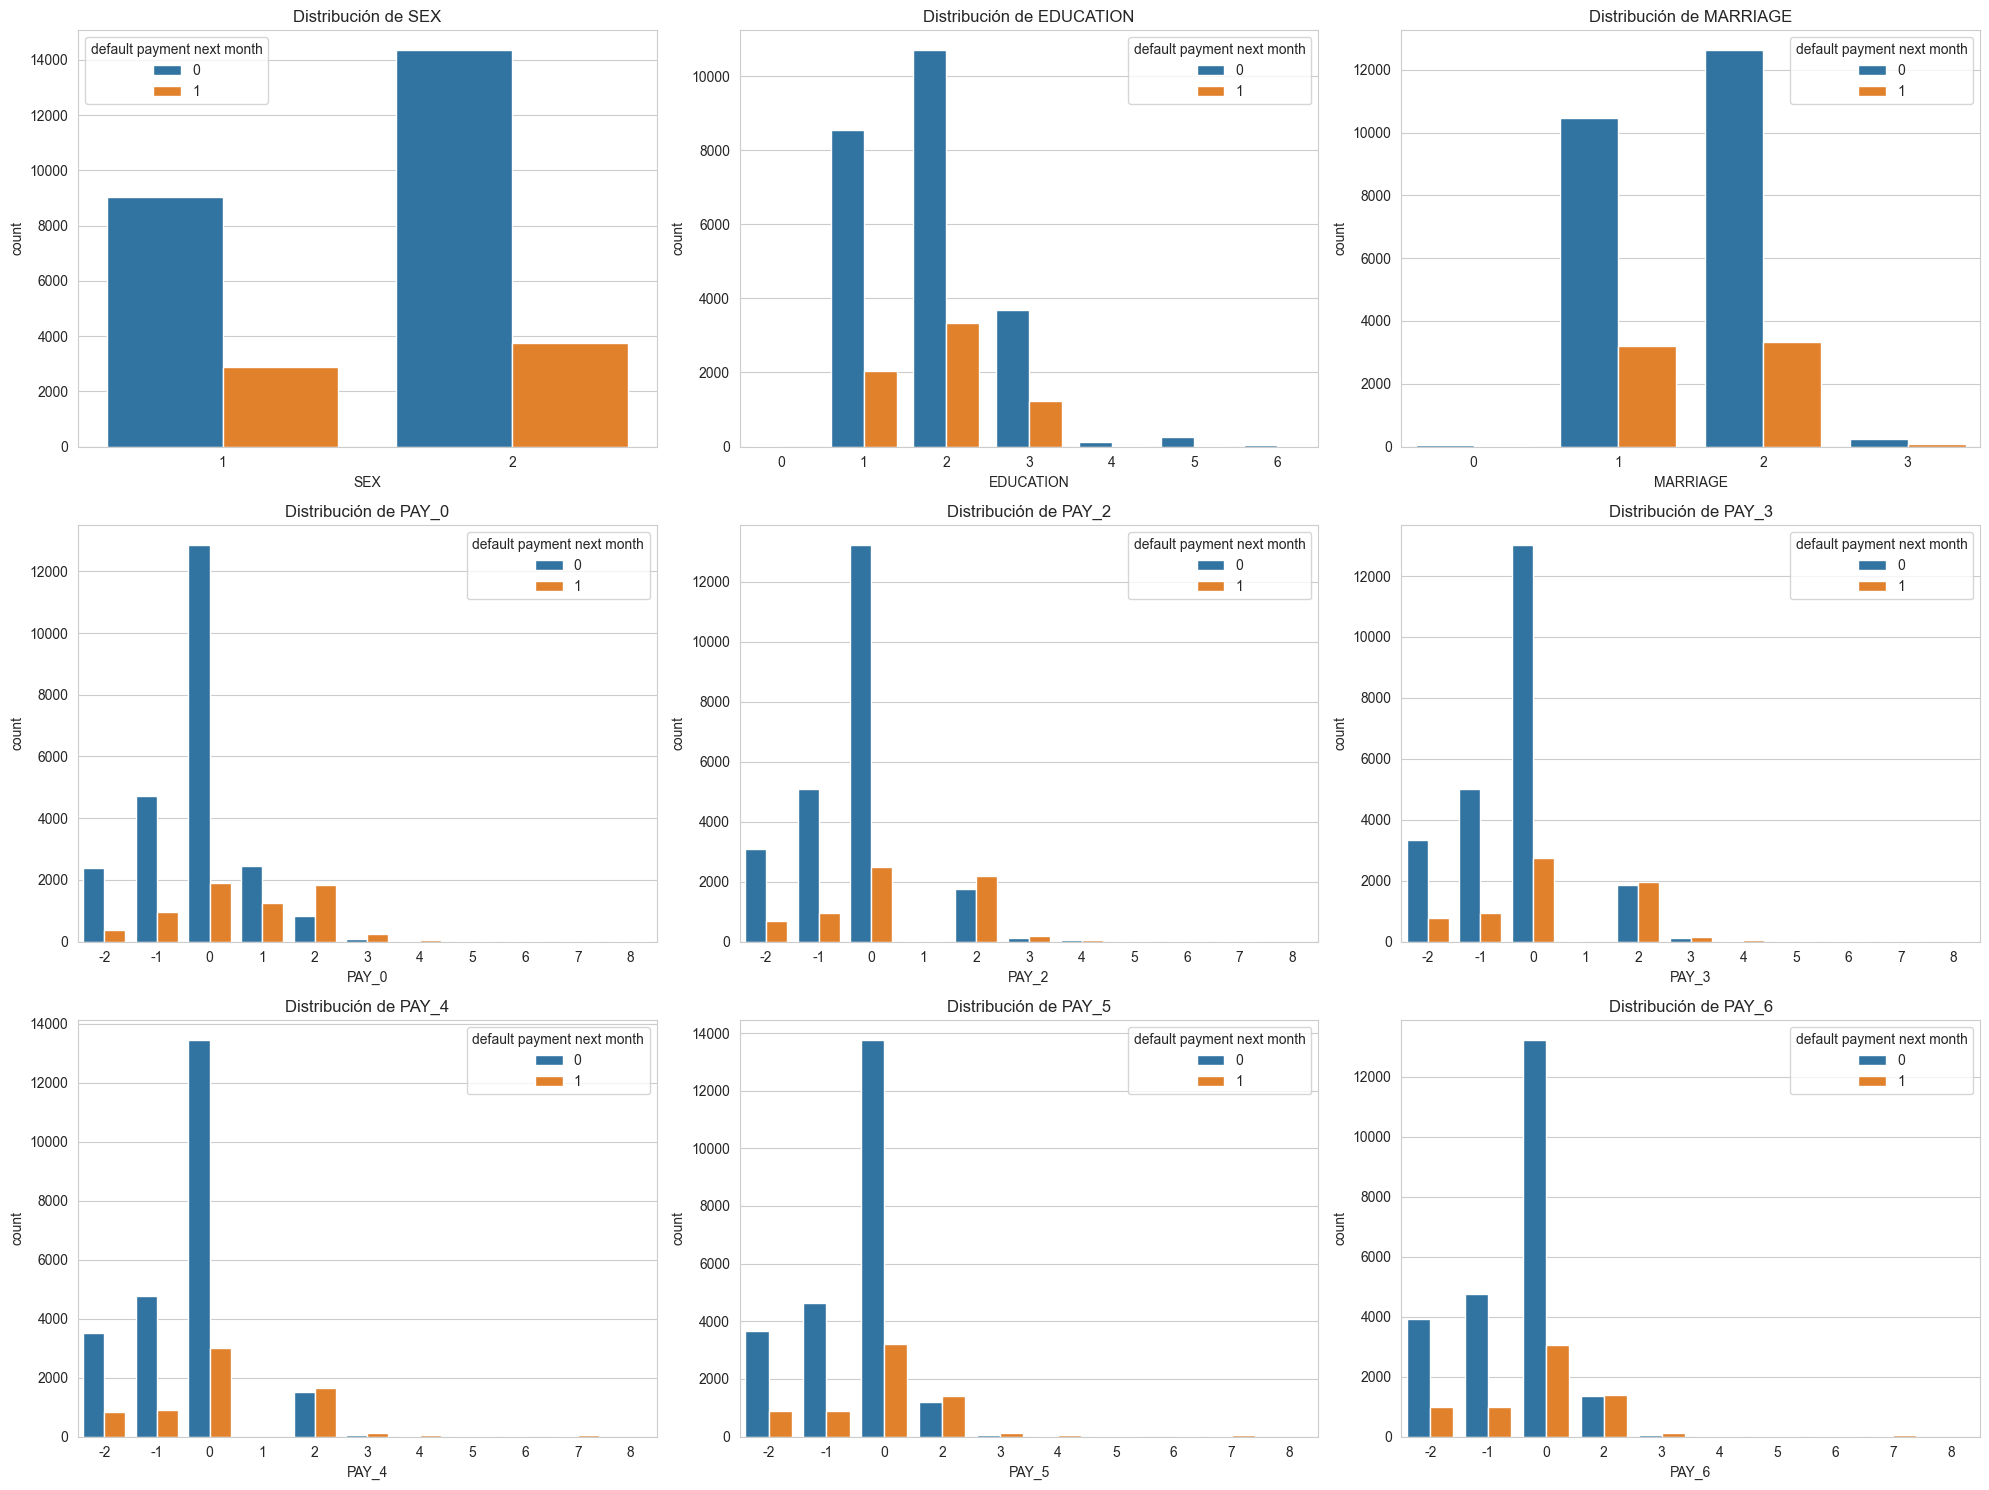

In [9]:
cat_cols = ['SEX', 'EDUCATION', 'MARRIAGE'] + [f'PAY_{i}' for i in [0, 2, 3, 4, 5, 6]]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue=target)
    axes[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

## 7. Análisis de Correlación

In [ ]:
plt.figure(figsize=(20, 18))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

**Observaciones de Correlación:**
- Fuerte correlación positiva entre los `BILL_AMT` de meses consecutivos, lo cual es esperado.
- Fuerte correlación positiva entre los `PAY_` de meses consecutivos.
- La correlación más fuerte con la variable objetivo `default payment next month` proviene de las variables `PAY_` (especialmente `PAY_0`). Un retraso en el pago más reciente es un fuerte predictor de impago futuro.

## 8. Hallazgos Preliminares y Siguientes Pasos

1. **Calidad de Datos:** El dataset es de alta calidad, sin valores nulos ni duplicados aparentes.
2. **Desbalance:** La clase minoritaria (impago) representa ~22% de los datos. Se requerirán técnicas de muestreo o ajuste de pesos.
3. **Predictoras Clave:** El historial de retrasos en los pagos (`PAY_` variables) parece ser el predictor más fuerte. El límite de crédito (`LIMIT_BAL`) también muestra una correlación negativa con el impago.
4. **Colinealidad:** Existe una alta colinealidad entre los montos de las facturas (`BILL_AMT`) y entre los historiales de pago (`PAY_`). Esto podría ser manejado con técnicas de reducción de dimensionalidad (PCA) o seleccionando las variables más representativas.

**Siguientes Pasos (Fase 4 - Feature Engineering):**
- Crear variables de utilización de crédito (`BILL_AMT` / `LIMIT_BAL`).
- Crear variables de ratio de pago (`PAY_AMT` / `BILL_AMT`).
- Agrupar categorías minoritarias en `EDUCATION` y `MARRIAGE`.
- Analizar la posibilidad de usar PCA sobre las variables `BILL_AMT`.